In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [2]:
d = pd.read_pickle("hourlies.pickle")

In [3]:
#explore a sample of the data
N = len(d)
S = 1 + np.random.choice(N-1, int(0.40*N), replace=False)

In [4]:
samp = d.iloc[S, :]

In [5]:
samp.describe()

,ELEVATION,LATITUDE,LONGITUDE,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYStationPressure,HOURLYPrecip,HOURLYAltimeterSetting
count,399736.000000,399736.000000,399736.000000,399736.000000,399736.000000,399736.000000,399736.000000,399736.000000,399736.000000,399736.000000,399736.000000
mean,518.699675,39.882514,-95.065139,54.018467,47.688534,41.273711,67.709823,8.405005,28.270003,3.920187,30.019073
std,621.468758,6.240871,15.986086,21.493523,18.774547,20.565173,22.704191,5.839637,2.004767,136.108291,0.215969
min,1.200000,29.638060,-122.313800,-29.000000,-29.000000,-36.000000,1.000000,0.000000,22.170000,0.000000,28.600000
25%,100.600000,34.643890,-106.615500,39.000000,35.000000,27.000000,53.000000,5.000000,26.570000,0.000000,29.900000
50%,190.800000,40.918100,-95.281940,56.000000,49.000000,41.000000,73.000000,8.000000,29.140000,0.000000,30.030000
75%,984.500000,44.883100,-81.693600,71.000000,62.000000,58.000000,87.000000,11.000000,29.700000,0.000000,30.150000
max,2296.100000,47.942800,-68.017300,110.000000,86.000000,83.000000,112.000000,53.000000,30.750000,9090.000000,31.020000


In [6]:
numvars = samp.loc[:,['STATION','HOURLYDRYBULBTEMPF', 'HOURLYDewPointTempF',
                   'HOURLYRelativeHumidity', 'HOURLYWindSpeed', 'HOURLYAltimeterSetting', 'HOURLYPrecip', 'HOURLYWETBULBTEMPF']]

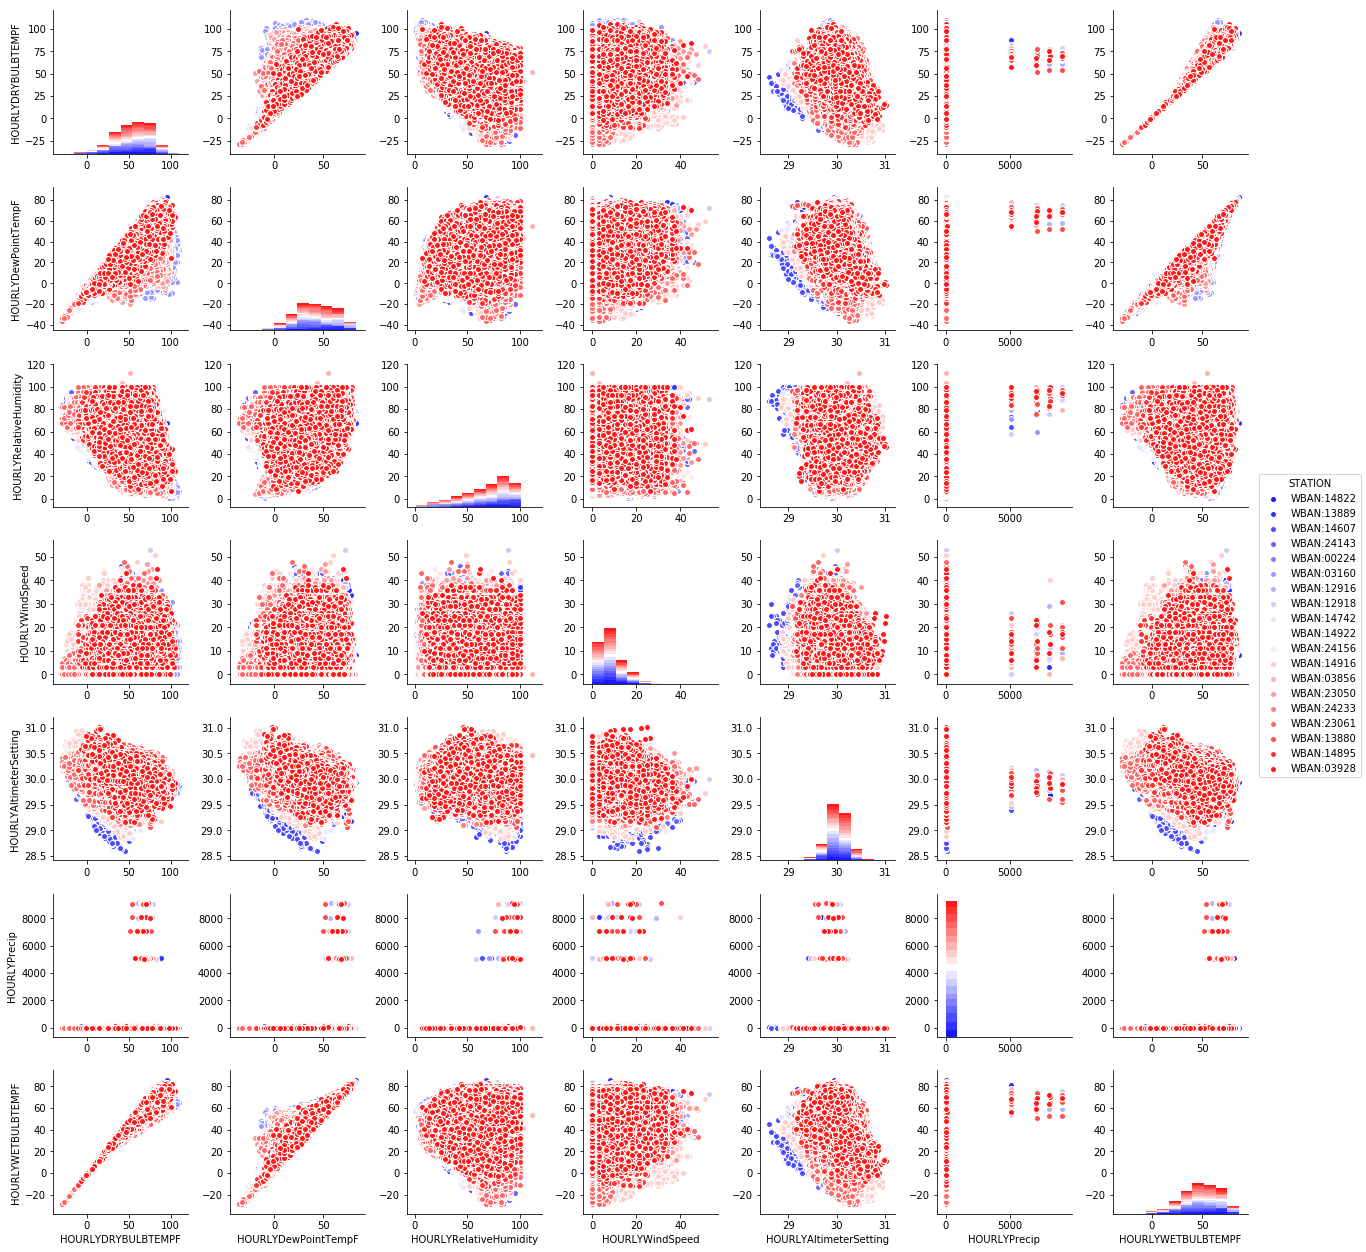

In [7]:
#View pairs plot by station to look for any clusters
sns.pairplot(numvars, hue = 'STATION', palette='bwr')

### Pressure Explore

I was curious about what pressure looked like from the varying locations, so I viewed the boxplots of the HOURLYAltimeterSetting.

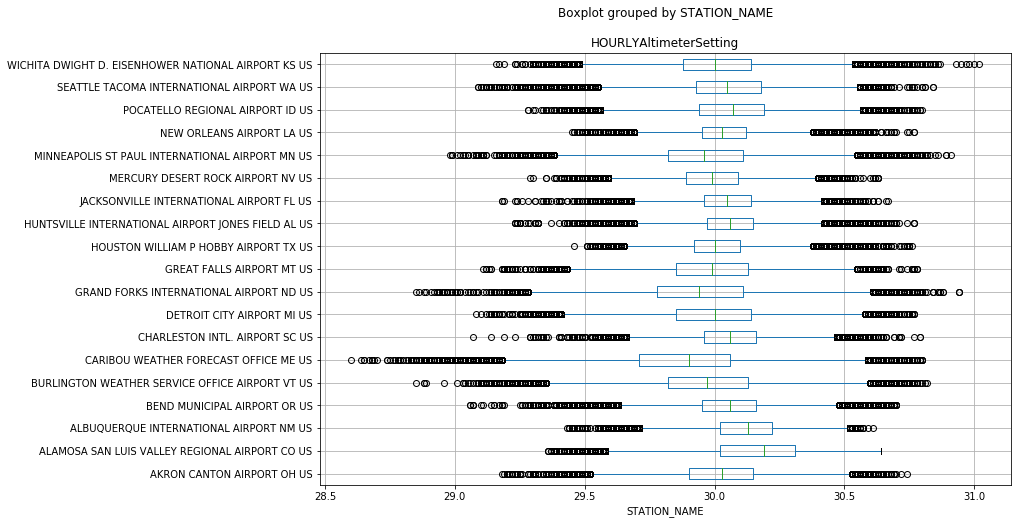

In [8]:
#Take a look at box_plots of some of the variables
fig, ax = plt.subplots(figsize=(12,8))
plt.suptitle('')
numvars.boxplot(column=['HOURLYAltimeterSetting'], by='STATION_NAME', ax=ax, vert = False)

### ALAMOSA, CO 

.....looks like a better place to live for migraine sufferers of low barometric pressure compared to Caribou, ME.  Confirm with some density plots and find the average.

30.147518675233833

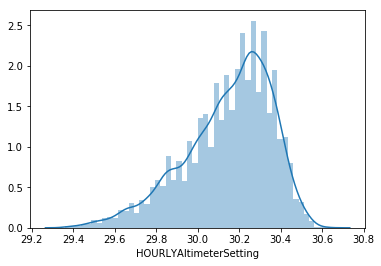

In [9]:
ALA = numvars.loc['ALAMOSA SAN LUIS VALLEY REGIONAL AIRPORT CO US','HOURLYAltimeterSetting']
ax = sns.distplot(ALA)
ALA.mean()

29.88050639007229

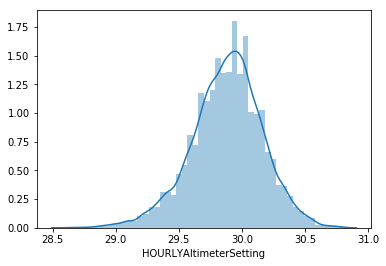

In [10]:
CARIBOU = numvars.loc['CARIBOU WEATHER FORECAST OFFICE ME US', 'HOURLYAltimeterSetting']
ax = sns.distplot(CARIBOU)
CARIBOU.mean()

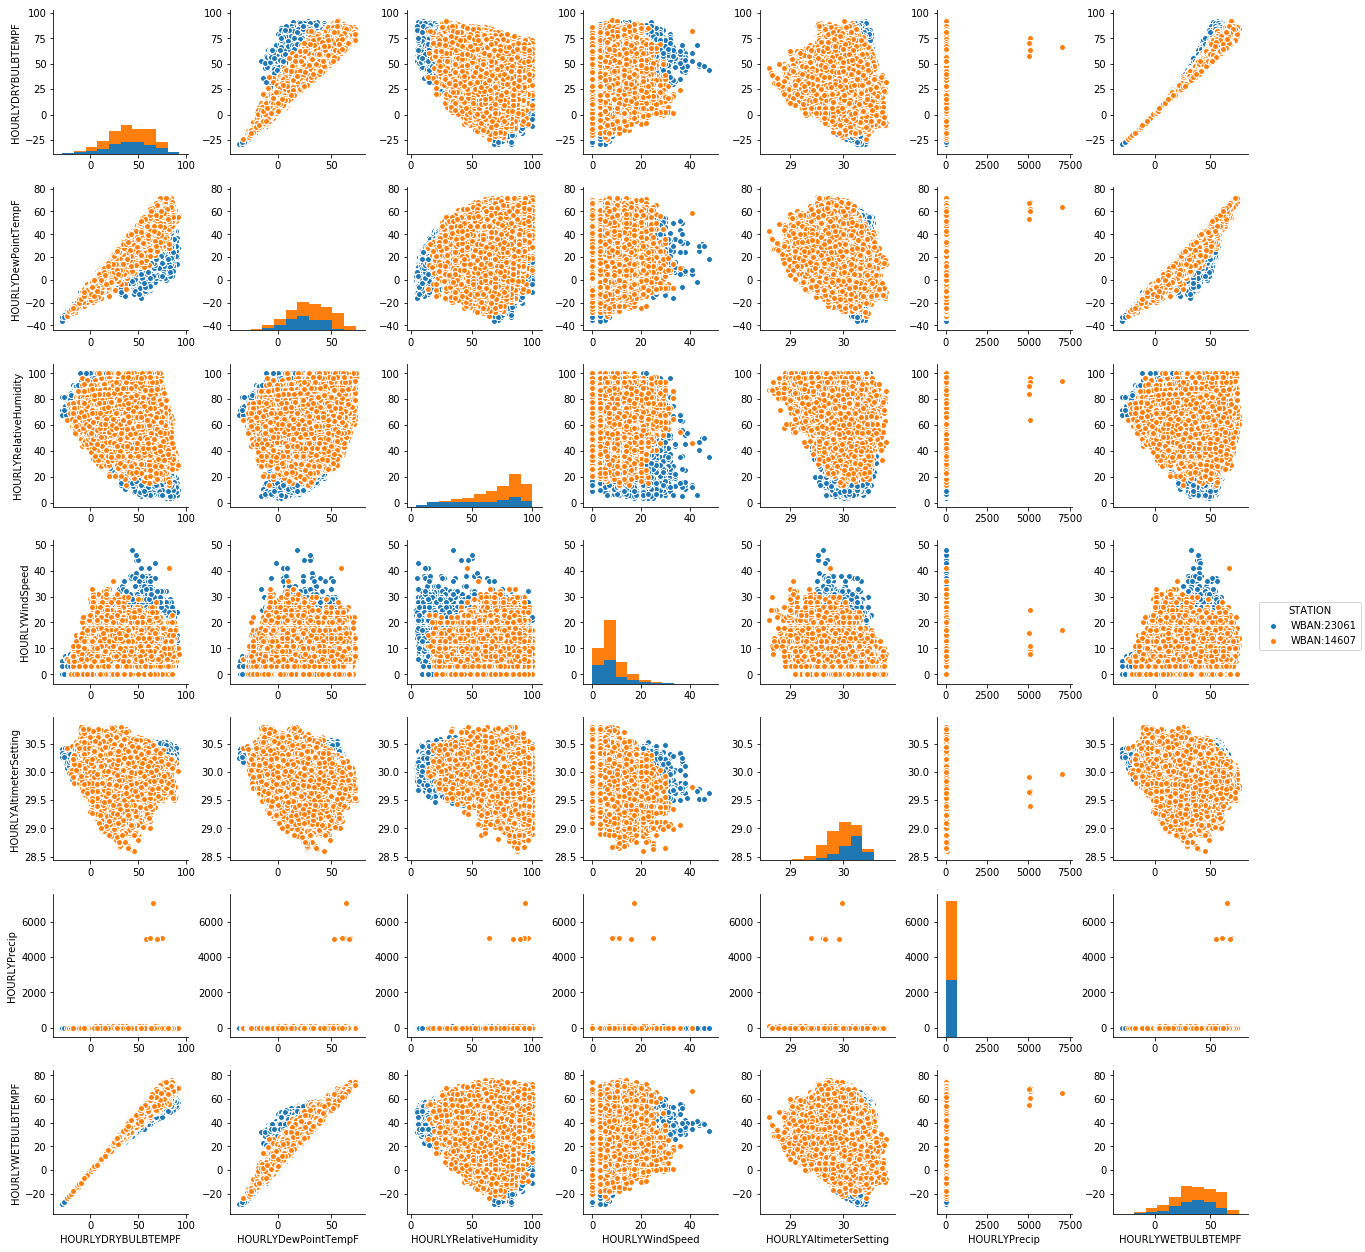

In [11]:
#Attempt to find any clusters between thoses pairs, still hard to distinguish
pair = numvars.loc[('ALAMOSA SAN LUIS VALLEY REGIONAL AIRPORT CO US', 'CARIBOU WEATHER FORECAST OFFICE ME US'), ]
sns.pairplot(pair, hue = 'STATION')